<a href="https://colab.research.google.com/github/Abicumaran/Abicumaran/blob/main/Adaboost_Reg_Copy_of_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
dataset = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(dataset['RFT.csv']))

Saving RFT.csv to RFT (2).csv


In [ ]:
dataset.head()

Diagnosis  ...  Power spectra inflection 3
0          1  ...                    0.009383
1          1  ...                    0.008896
2          1  ...                    0.008951
3          1  ...                    0.009277
4          1  ...                    0.009078

[5 rows x 4 columns]

In [ ]:
y = dataset['Diagnosis']
X = dataset.drop(['Power spectra inflection 3','Diagnosis'], axis = 1)

# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.5, random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
RF_model = AdaBoostClassifier(**parameters)

In [ ]:
RF_model.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
RF_predictions = RF_model.predict(test_X)

In [ ]:
score = accuracy_score(test_y ,RF_predictions)
print(score)

0.9583333333333334


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, RF_predictions, sample_weight=None, multioutput='uniform_average', squared=True)

0.041666666666666664

In [ ]:
percentage = RF_model.score(test_X, test_y)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(test_y, RF_predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(test_X)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[22  2]
 [ 0 24]]
Test Set: 48
Accuracy = 95.83333333333334 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator = RF_model, X= train_X, y= train_y, cv=10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:100.00%
Standard Deviation:0.00%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_y,RF_predictions))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        24
           2       0.92      1.00      0.96        24

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
roc_curve(test_y, RF_predictions, pos_label=1, sample_weight=None, drop_intermediate=True)

(array([0., 1., 1.]),
 array([0.        , 0.08333333, 1.        ]),
 array([3, 2, 1]))

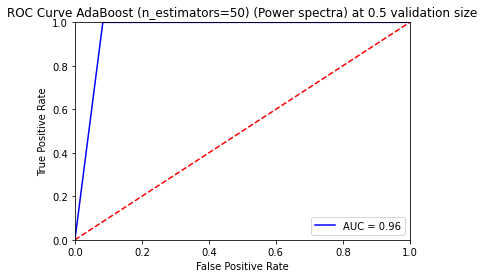

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_model.predict_proba(test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, RF_predictions, pos_label = 2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve AdaBoost (n_estimators=50) (Power spectra) at 0.5 validation size')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import learning_curve #learningcurves

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
...     RF_model, X, y, train_sizes=(76,), cv=5)

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
...     RF_model, X, y, # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)# Create means and standard deviations of training set scores
train_std = np.std(train_scores, axis=1)

In [ ]:
test_mean = np.mean(test_scores, axis=1) # Create means and standard deviations of test set scores
test_std = np.std(test_scores, axis=1)

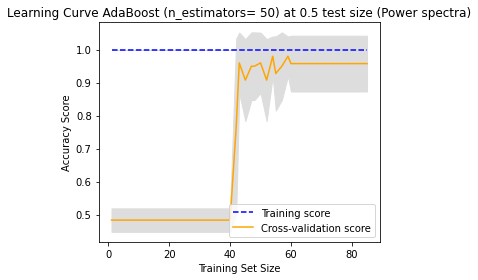

In [ ]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve AdaBoost (n_estimators= 50) at 0.5 test size (Power spectra)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()